In [12]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [13]:
def data_raw_to_data(data_raw, data_option):
    plot_option = data_option #1 = Signal1, 2 = Signal2, 3 = delta of signals
    err = None

    #Choose what to plot
    if plot_option == 3:
        data = data_raw[1] - data_raw[2]
        shift = (data_raw.shape[0]-1)//2
        err1 = abs(data_raw[1+shift])
        err2 = abs(data_raw[2+shift])
        err = err1+err2
    else:
        data = data_raw[plot_option]
        shift = (data_raw.shape[0]-1)//2
        err = data_raw[plot_option+shift]
        
    return data, err

In [14]:
base_path = "G:\\Data\\Projects\\NbSe2\\S4\\AC studies\\"
file_path = base_path + "Set D\\A-H12-13 70mT\\"
filelabel = 'A-H12-13_70mT_Hahn_echo_comparison'
hechos_OOC_paths_CS = glob.glob(file_path + "*_OOC*_pulsed_measurement.dat")
hechos_OOC_paths_C0 = glob.glob(file_path + "*_OOC*_pulsed_measurement.dat")
hechos_IC_paths_CS = glob.glob(file_path + "*_IC*_pulsed_measurement.dat")
hechos_IC_paths_C0 = glob.glob(file_path + "*_IC*_pulsed_measurement.dat")

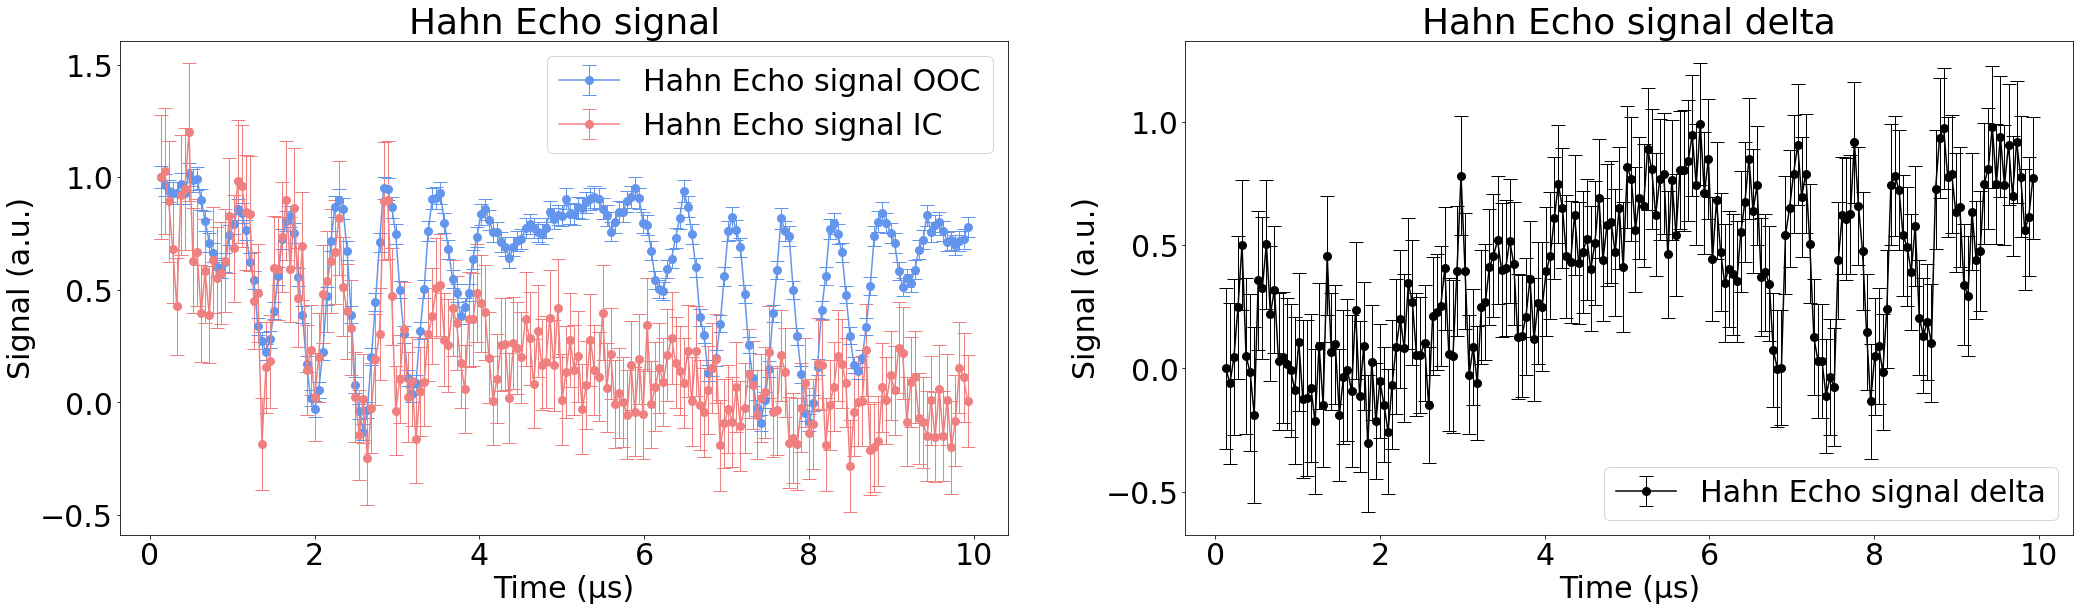

In [25]:
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 800
plt.rcParams.update({'font.size': 30})
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
# ax1.set_xscale('log')
# ax2.set_xscale('log')

data_raw_OOC_CS = np.loadtxt(hechos_OOC_paths_CS[0]).T
#C0 is the siganl for case, where the MW is off-resonant to the NV. It is not needed for this calculation
data_raw_OOC_C0 = np.loadtxt(hechos_OOC_paths_C0[0]).T
data_raw_IC_CS = np.loadtxt(hechos_IC_paths_CS[0]).T
data_raw_IC_C0 = np.loadtxt(hechos_IC_paths_C0[0]).T

data_OOC_CS, err_OOC_CS = data_raw_to_data(data_raw_OOC_CS, 3)
data_OOC_C0, err_OOC_C0 = data_raw_to_data(data_raw_OOC_C0, 2)
data_IC_CS, err_IC_CS = data_raw_to_data(data_raw_IC_CS, 3)
data_IC_C0, err_IC_C0 = data_raw_to_data(data_raw_IC_C0, 2)

signal_OOC = data_OOC_CS
signal_IC = data_IC_CS

signal_err_OOC = err_OOC_CS
signal_err_IC = err_IC_CS

signal_err_OOC = np.sqrt((err_OOC_CS/signal_OOC[0])**2+(signal_OOC/signal_OOC[0]**2*err_OOC_CS[0])**2)

signal_err_IC = np.sqrt((err_IC_CS/signal_IC[0])**2+(signal_IC/signal_IC[0]**2*err_IC_CS[0])**2)

signal_delta = signal_OOC/signal_OOC[0]-signal_IC/signal_IC[0] #signal_OOC-signal_IC
signal_delta_err = signal_err_OOC+signal_err_IC

var_list = data_raw_OOC_CS[0]*1e6

ax1.errorbar(x=var_list, y=signal_OOC/signal_OOC[0],
                         yerr=signal_err_OOC, fmt='-o',
                         capsize=7, capthick=1,
                        elinewidth=1, markersize=8, label=f'Hahn Echo signal OOC', color='cornflowerblue')

ax1.errorbar(x=var_list, y=signal_IC/signal_IC[0],
                         yerr=signal_err_IC, fmt='-o',
                         capsize=7, capthick=1,
                        elinewidth=1, markersize=8, label=f'Hahn Echo signal IC', color='lightcoral')

ax2.errorbar(x=var_list, y=signal_delta,
                         yerr=signal_delta_err, fmt='-o',
                         capsize=7, capthick=1,
                        elinewidth=1, markersize=8, label=f'Hahn Echo signal delta', color='black')


ax1.title.set_text('Hahn Echo signal')
ax2.title.set_text('Hahn Echo signal delta')

ax1.set_xlabel('Time (µs)')
ax1.set_ylabel('Signal (a.u.)')
ax2.set_xlabel('Time (µs)')
ax2.set_ylabel('Signal (a.u.)')

ax1.legend()
ax2.legend()

# tau_max = 6.5
# ax1.vlines(tau_max,-1,1)
# ax2.vlines(tau_max,-1,1)

with open(file_path+filelabel+'.png', 'wb') as f:
    plt.savefig(f,format='png')
plt.show()